In [1]:
!pip install opendatasets -q

In [2]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import pandas as pd
import opendatasets as od

In [3]:
#Load Dataset

od.download("https://www.kaggle.com/competitions/digit-recognizer/data")

#{"username":"dasundhananjaya","key":"0275f377f406f778d92f7c8c2bf36277"}

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dasundhananjaya
Your Kaggle Key: ··········


100%|██████████| 15.3M/15.3M [00:00<00:00, 102MB/s] 


Extracting archive ./digit-recognizer/digit-recognizer.zip to ./digit-recognizer


In [4]:
sample = pd.read_csv('/content/digit-recognizer/sample_submission.csv')

test = pd.read_csv('/content/digit-recognizer/test.csv')
train = pd.read_csv('/content/digit-recognizer/train.csv')



In [5]:
len(train),len(test),len(sample)

(42000, 28000, 28000)

In [6]:
print("train shape: ",train.shape)
print("test shape: ",test.shape)

train shape:  (42000, 785)
test shape:  (28000, 784)


In [7]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [8]:
test.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [9]:
print(train['label'].unique())
print(train['label'].nunique())

[1 0 4 7 3 5 8 9 2 6]
10


In [10]:
# prompt: generate a code to find out if there are column name "label" in train

"label" in test.columns


False

In [11]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


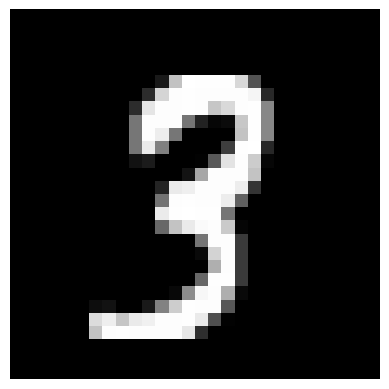

In [12]:
# prompt: genarate code to view sample image of train

import numpy as np
import matplotlib.pyplot as plt

# Select a random image from the training set.
index = np.random.randint(0, len(train))
image = train.iloc[index, 1:].values.reshape((28, 28))

# Display the image.
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()


In [13]:
x = train.drop('label',axis=1) #
y = train['label']

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
x_train.shape

(33600, 784)

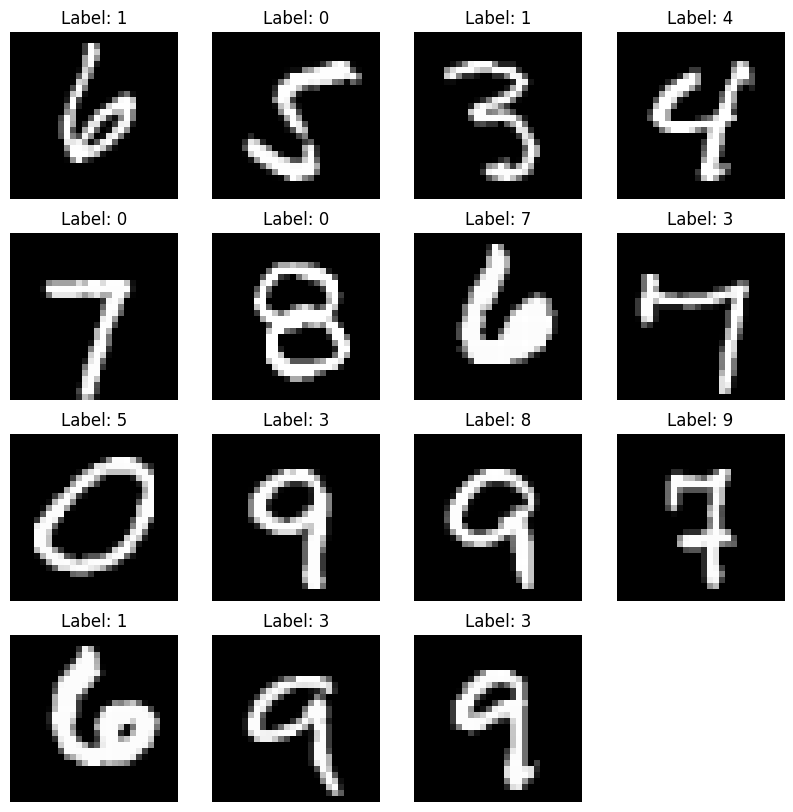

In [16]:
# Plot 4 images with labels from train
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(4,4, i + 1)
    plt.title("Label: " + str(y[i]))
    plt.axis("off")
    plt.imshow(np.reshape(x_train.iloc[i,:].values,(28,28)),cmap='gray')

In [17]:
#normalize data
# x_train = x_train/255
# x_test = x_test/255
# test = test/255


In [18]:
x_train.shape , y_train.shape

((33600, 784), (33600,))

In [19]:
#Reshape images

# x_train = x_train.values.reshape(-1,28,28,1)
# x_test = x_test.values.reshape(-1,28,28,1)

x_train=x_train.values.reshape(x_train.shape[0],28,28,1)/255.0
x_test=test.values.reshape(test.shape[0],28,28,1)/255.0


In [20]:
x_train.shape,x_test.shape

((33600, 28, 28, 1), (28000, 28, 28, 1))

In [21]:
# y_train = y_train.values.reshape(-1, 1)
# y_test = y_test.values.reshape(-1, 1)

In [22]:
(x_train.ndim),(x_test.ndim),(y_train.ndim),(y_test.ndim)

(4, 4, 1, 1)

In [23]:
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train, num_classes=10)

# Convert y_train to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [24]:
#Defining the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
  tf.keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  #tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(10, activation='softmax')
])

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

# model=Sequential()
# model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=(28,28,1)))
# model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
# model.add(Conv2D(filters=192,kernel_size=3,padding='same',activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
# model.add(MaxPooling2D(pool_size=2,padding='same'))
# model.add(Flatten())
# model.add(Dense(units=256,activation='relu'))
# model.add(Dense(units=10,activation='softmax'))
model.summary()
#model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                   

In [25]:
#y_pred = tf.keras.utils.to_categorical(model.predict(x_train), num_classes=10)

In [26]:
test.shape

(28000, 784)

In [27]:
# prompt: genarate a code to divide test dataframe to validation data

x_test, x_val, y_test, y_val = train_test_split(test, sample, test_size=0.2, random_state=42)


In [28]:
import tensorflow as tf

Optimizer = tf.keras.optimizers.Adam(
            learning_rate=0.0005,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            name='Adam'
)




# Recompile the model with the new y_train shape
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model again
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
945/945 [==============================] - 13s 6ms/step - loss: 0.3684 - accuracy: 0.8781 - val_loss: 0.0734 - val_accuracy: 0.9756
Epoch 2/5
945/945 [==============================] - 6s 7ms/step - loss: 0.0939 - accuracy: 0.9725 - val_loss: 0.0387 - val_accuracy: 0.9881
Epoch 3/5
945/945 [==============================] - 5s 6ms/step - loss: 0.0682 - accuracy: 0.9802 - val_loss: 0.0390 - val_accuracy: 0.9887
Epoch 4/5
945/945 [==============================] - 6s 7ms/step - loss: 0.0553 - accuracy: 0.9835 - val_loss: 0.0365 - val_accuracy: 0.9887
Epoch 5/5
945/945 [==============================] - 5s 6ms/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0346 - val_accuracy: 0.9887


In [29]:
x_train.shape, x_train.shape


((33600, 28, 28, 1), (33600, 28, 28, 1))

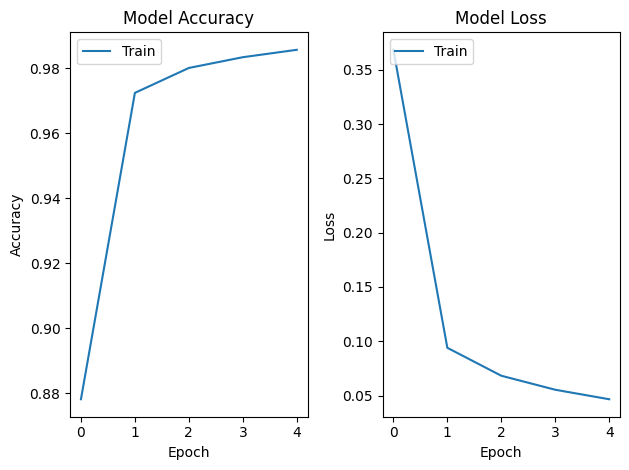

In [30]:
# Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')

# Show the graphic
plt.tight_layout()
plt.show()

In [31]:
def plot_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Train loss vs Validation Loss")
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend(['train','validation'],loc='upper right')
  plt.show()

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Train accuracy vs Validation accuracy 2")
  plt.ylabel('accuracy')
  plt.xlabel('epochs')
  plt.legend(['train','validation'],loc='upper right')
  plt.show()

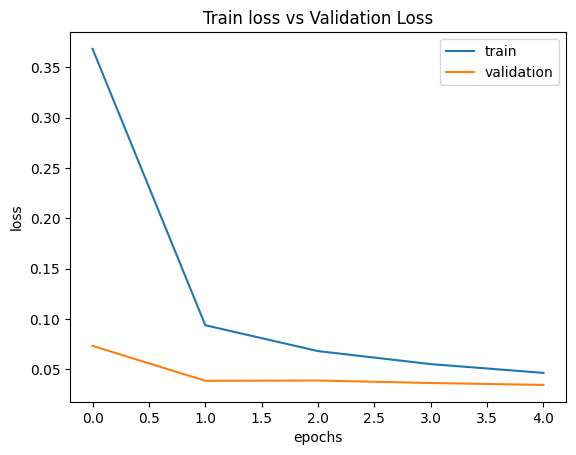

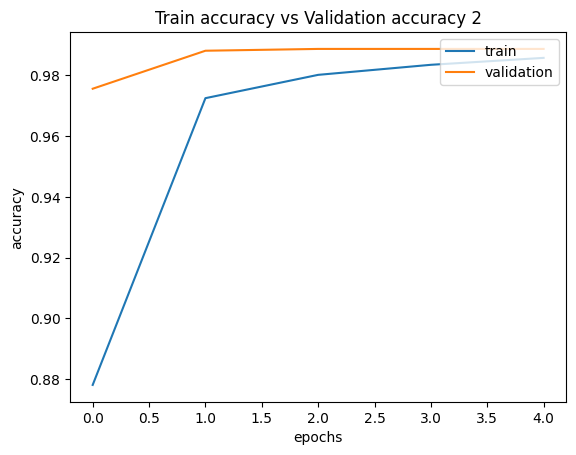

In [32]:
plot_history(history)

In [33]:
print(x_train.shape)

(33600, 28, 28, 1)


In [34]:
x_train = x_train.reshape(33600, 28, 28, 1)

https://www.kaggle.com/models/tensorflow/mnist

# Model Saving

In [35]:
#model.save('saved_model')


In [36]:
#model.save('saved_model_h5.h5')

# Load model

In [37]:
test.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


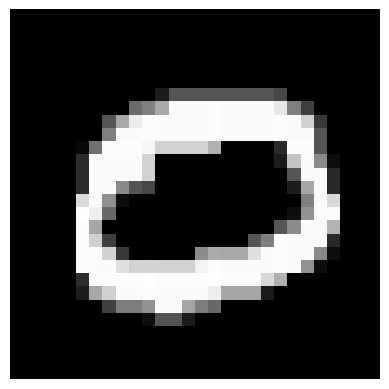

In [38]:
image = test.iloc[1].values.reshape(28,28)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [55]:
image = test.iloc[0].values.reshape(28,28,1)

new_image = np.expand_dims(image,0)
new_image.shape


(1, 28, 28, 1)

In [57]:
model.predict(new_image)

1/1 [==============================] - 0s 20ms/step


array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
sample_dir =pd.read_csv('/content/digit-recognizer/sample_submission.csv')
train_dir =pd.read_csv('/content/digit-recognizer/train.csv')
test_dir =pd.read_csv('/content/digit-recognizer/test.csv')

In [49]:
sample_dir.head(3)

,ImageId,Label
0,1,0
1,2,0
2,3,0


In [50]:
train_dir.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
test_dir.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
# prompt: generate a code to predict from the model

import numpy as np
predictions = model.predict(new_image)
predicted_labels = np.argmax(predictions, axis=1)

train_dir['label'] = predicted_labels
sample.head()


1/1 [==============================] - 0s 27ms/step


ValueError: Length of values (1) does not match length of index (42000)